# High Level Programming Course

## Project: Delay Tolerant Network

### Group 10
Members: 

Ahmed Shahhat 2008561

Fatemeh Nikraftar Khamene 2014329

Mudit Sharma 1216120

Golnaz Tajbakhsh 2016508

### First we created a simple network to analyze our algorithms on it and check the delays.

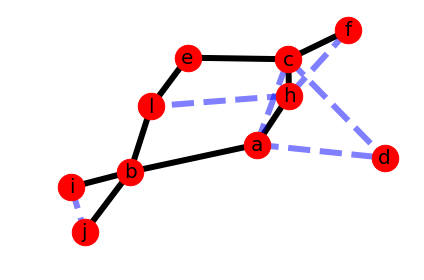

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G1 = nx.Graph()

G1.add_edge("a", "b", weight=0.6)
G1.add_edge("a", "c", weight=0.2)
G1.add_edge("c", "d", weight=0.1)
G1.add_edge("c", "e", weight=0.7)
G1.add_edge("c", "f", weight=0.9)
G1.add_edge("a", "d", weight=0.3)
G1.add_edge("a", "h", weight=0.8)
G1.add_edge("h", "f", weight=0.3)
G1.add_edge("h", "c", weight=0.9)
G1.add_edge("b", "l", weight=0.8)
G1.add_edge("b", "l", weight=0.8)
G1.add_edge("l", "h", weight=0.2)
G1.add_edge("l", "e", weight=1.0)
G1.add_edge("i", "b", weight=2.0)
G1.add_edge("i", "j", weight=0.2)
G1.add_edge("b", "j", weight=0.7)

elarge = [(u, v) for (u, v, d) in G1.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G1.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G1, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=700)

# edges
nx.draw_networkx_edges(G1, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G1, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G1, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# We used 4 algorithms such as :
1. Bellman_Ford algorithm
2. Dijkstra algorithm
3. Floyd-Warshall algorithm
4. Johnson's algorithm

# Bellman_Ford Algorithm

#PseudoCode : Bellman_Ford 

    The algorithm has a running time of O(mn) where n is the number of nodes and m is the number of edges.  
    
    It is slower than Dijkstra but can handle negative edge weights.


    The first thing the algoritim do is to put all nodes at infinity except the source node that will be at 0 cordinate .
    The source node from which the algoritim start should have at less one edge going from it otherwise we will have a result 0 for this node and infiity for all others.
    The code can not handel negitive cycles but can deal with negitive delays.



    Step 1: Prepare the distance and predecessor for each node
    for node in graph:
            distance[node], predecessor[node] = float('inf'), None  # the source node from where the algoritim start have 0 distance and all other at inf
        distance[source] = 0



    Step 2: Relax the edges
    for j in (len(G1)-1): # loop for all nodes and cheak each node distances from the other nodes
      for i in node :  # updateing the distances with the min values 
            if distance[neighbour] > distance[node] + graph[node][neighbour]:  # If the distance between the node and the neighbour is lower than the current, store it
                distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node



    Step 3: Check for negative weight cycles
        for node in graph: #raising an error in case of negitive cycles 
            for neighbour in graph[node]:
                assert distance[neighbour] <= distance[node] + graph[node][neighbour], "Negative weight cycle."

        return distance, predecessor # algoritim output the distance of each node from the source node

In [6]:
def bellman_ford(G, start,end, weight = 'weight'):
    # Compute shortest path lengths and predecessors on shortest paths in weighted graphs.

    if start not in G:
        raise KeyError("Node %s is not found in the graph"%source)
    numb_nodes = len(G)

    dist = {start: 0}
    pred = {start: None}

    if numb_nodes == 1:
       return pred, dist

    if G.is_multigraph():
        def get_weight(edge_dict):
            return min([eattr.get(weight,1) for eattr in edge_dict.values()])
    else:
        def get_weight(edge_dict):
            return edge_dict.get(weight,1)

    for i in range(numb_nodes):
        if i > 5:
            if dist[i] and dist[i-1] and dist[i-2] and dist[i-3] and dist[i-4] and dist[i-5] < 0 :
                    break 
        no_changes=True
        # Only need edges from nodes in dist b/c all others have dist==inf
        for u, dist_u in list(dist.items()): # get all edges from nodes in dist
            for v, edict in G[u].items():  # double loop handles undirected too
                dist_v = dist_u + get_weight(edict)
                if v not in dist or dist[v] > dist_v:
                    dist[v] = dist_v
                    pred[v] = u
                    no_changes = False
        if no_changes:
            break
        
    #else:
        #raise nx.NetworkXUnbounded("Negative cost cycle detected.")
    return pred, dist

Bellman Ford Algoritm distances are =  {'a': 0, 'b': 0.6, 'c': 0.2, 'd': 0.3, 'h': 0.8, 'l': 1.0, 'i': 1.4999999999999998, 'j': 1.2999999999999998, 'e': 0.8999999999999999, 'f': 1.1}
Runtime of the program is 0.0


Text(0, 0.5, 'Distances')

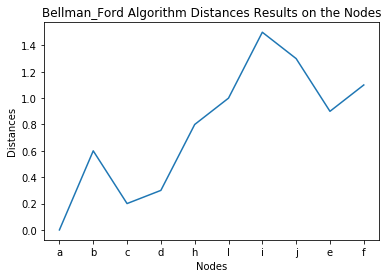

In [7]:
import time
start = time.time()
pred,distance = bellman_ford(G1,"a","i")
print ("Bellman Ford Algoritm distances are = " , distance)
end = time.time()
print(f"Runtime of the program is {end - start}")

#change type of dict to list for using data for plotting
data_bel = list(distance.items())
an_array_bel = np.array(data_bel)
x = an_array_bel[:,0]
y = [float(i) for i in an_array_bel[:,1]]
plt.plot(x,y)
plt.title('Bellman_Ford Algorithm Distances Results on the Nodes')
plt.xlabel('Nodes')
plt.ylabel('Distances')


# Dijkstra algorithm

PseudoCode:

Add the starting vertex s to the initially empty fringe with priority value 0

Add all other vertices to the fringe with priority value of infinity

While the fringe is not empty:

    Remove the vertex in the fringe with the minimum priority.
        We'll call this vertex u.
        Its priority is the shortest distance from s to u.
    For each of u's neighbors v:
        If v is not already in the priority queue, do nothing.
            (We've already found the shortest distance from s to v.)
        Otherwise, update v's predecessor to u, and update its priority value to the minimum of:
            Its current priority value
            The shortest distance from s to u + the weight of the edge (u, v)

function Dijkstra(Graph, source):
 
      create vertex set Q
 
      for each vertex v in Graph:           // Initialization
          dist[v] ← INFINITY                // Unknown distance from source to v
          prev[v] ← UNDEFINED               // Previous node in optimal path from source
          add v to Q                        // All nodes initially in Q (unvisited nodes)
 
     dist[source] ← 0                      // Distance from source to source
      
     while Q is not empty:
         u ← vertex in Q with min dist[u]  // Node with the least distance
                                           // will be selected first
         remove u from Q 
          
         for each neighbor v of u:         // where v is still in Q.
             alt ← dist[u] + length(u, v)
             if alt < dist[v]:             // A shorter path to v has been found
                 dist[v] ← alt 
                 prev[v] ← u 

     return dist[], prev[]

In [8]:
from queue import PriorityQueue
from math import inf 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Dijkstra's shortest path algorithm
def dijkstra(graph, start,end):
    #Get the shortest path of nodes by going backwards through prev list
   
    def backtrace(prev, start,end):
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
        
    #get the cost of edges from node to node
    #cost(u,v) = edge_weight(u,v)
    def cost(u, v):
        return graph.get_edge_data(u,v).get('weight')
        
    #main algorithm
    
    prev = {} 
    # initialize distances from start to the given node 
    dist = {v: inf for v in list(nx.nodes(graph))} 
    # nodes we've visited
    visited = set() 
    # prioritize nodes from start to node with the shortest distance!
    pq = PriorityQueue()  
    
    dist[start] = 0  # dist from start
    pq.put((dist[start], start))
    
    while 0 != pq.qsize():
        curr_cost, curr = pq.get()
        visited.add(curr)
        # print(f'visiting {curr}')
        for neighbor in dict(graph.adjacency()).get(curr):
            # if we found a shorter path 
            path = dist[curr] + cost(curr, neighbor)
            if path < dist[neighbor]:
                # update the distance, we found a shorter one
                dist[neighbor] = path
                # update the previous node
                prev[neighbor] = curr
                # if we haven't visited the neighbor
                if neighbor not in visited:
                    # insert into priority queue and mark as visited
                    visited.add(neighbor)
                    pq.put((dist[neighbor],neighbor))
                # else update the entry in the priority queue
                else:
                    # remove old
                    _ = pq.get((dist[neighbor],neighbor))
                    # insert new
                    pq.put((dist[neighbor],neighbor))
    
    print("Dijkstra's Algo Output:")
    print("Distances")
    print(dist)
    print("Visited")
    print(visited)
    # print("Previous")
    # print(prev)

    
    #after every possible path has been checked done
    return dist, backtrace(prev, start,end), dist[end]

Dijkstra's Algo Output:
Distances
{'a': 0, 'b': 0.6, 'c': 0.2, 'd': 0.3, 'e': 0.8999999999999999, 'f': 1.1, 'h': 0.8, 'l': 1.0, 'i': 1.4999999999999998, 'j': 1.2999999999999998}
Visited
{'d', 'a', 'l', 'b', 'i', 'f', 'j', 'c', 'h', 'e'}
Runtime of the program is 0.0


Text(0, 0.5, 'Distances')

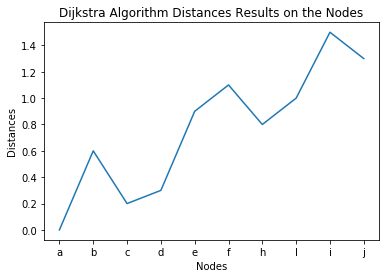

In [9]:
import time
start = time.time()
D,_,_ = dijkstra(G1,"a","i")
end = time.time()
print(f"Runtime of the program is {end - start}")
#change type of dict to list for using data for plotting
data_dij= list(D.items())
an_array_dij = np.array(data_dij)
x = an_array_dij[:,0]
y = [float(i) for i in an_array_dij[:,1]]
plt.plot(x,y)
plt.title('Dijkstra Algorithm Distances Results on the Nodes')
plt.xlabel('Nodes')
plt.ylabel('Distances')

# Floyd-Warshall Algorithm

    PseudoCode : Floyd-Warshall Algorithm for shortest paths
    
    3 let dist be a |V| × |V| array of minimum distances initialized to ∞ (infinity)
    4 for each edge (u, v) do
    5     dist[u][v] ← w(u, v)  // The weight of the edge (u, v)
    6 for each vertex v do
    7    dist[v][v] ← 0
    8 for k from 1 to |V|
    9    for i from 1 to |V|
    10        for j from 1 to |V|
    11            if dist[i][j] > dist[i][k] + dist[k][j] 
    12                dist[i][j] ← dist[i][k] + dist[k][j]
    13            end if

In [10]:
from numpy import array, asarray, inf, zeros, minimum, diagonal
from numpy.random import randint
import time
import numpy as np
from scipy.sparse import csr_matrix

INF = 99999999

def check_adjacency_matrix(adjacency_matrix):
    mat = np.asarray(adjacency_matrix)
    (num_rows, num_cols) = mat.shape
   # print (num_rows,ncols)
    assert num_rows == num_cols
    n = num_rows
    assert (diagonal(mat) == 0.0).all()
    return (mat, n)

def floyd_warshall_c(adjacency_matrix):  
    (mat, n) = check_adjacency_matrix(adjacency_matrix)
    mat_list = [mat]
    for k in range(n):
        nxt_mat = zeros((n,n))
        for i in range(n):
            for j in range(n):
                nxt_mat[i,j] = min(mat[i,j], mat[i,k] + mat[k,j])
        mat = nxt_mat
        mat_list.append(mat)
    return mat_list[-1]

def warshall_inplace(adjacency_matrix):
    (mat, n) = check_adjacency_matrix(adjacency_matrix)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                mat[i,j] = min(mat[i,j], mat[i,k] + mat[k,j])
    return mat

def graph_to_mat(graph):
  m1 = nx.adjacency_matrix(graph)
  m2 = csr_matrix.toarray(m1)
  for i in range(0,len(graph)):
    for j in range(0,len(graph)):
      if( m2[i][j] == 0 and i!=j):
         m2[i][j] = INF
      if(i == j):
         m2[i][i] = 0
  return m2
##m2 is now adjacency matrix

def floyd_warshall_output(graph):
  ad_mat = graph_to_mat(graph)
  output = floyd_warshall_c(ad_mat)
  return output


floyd_warshall distances are : [0.  0.6 0.2 0.3 0.9 1.1 0.8 1.  1.5 1.3]
floyd_warshall distances are : [0.6 0.  0.8 0.9 1.5 1.3 1.  0.8 0.9 0.7]
floyd_warshall distances are : [0.2 0.8 0.  0.1 0.7 0.9 0.9 1.1 1.7 1.5]
floyd_warshall distances are : [0.3 0.9 0.1 0.  0.8 1.  1.  1.2 1.8 1.6]
floyd_warshall distances are : [0.9 1.5 0.7 0.8 0.  1.5 1.2 1.  2.4 2.2]
floyd_warshall distances are : [1.1 1.3 0.9 1.  1.5 0.  0.3 0.5 2.2 2. ]
floyd_warshall distances are : [0.8 1.  0.9 1.  1.2 0.3 0.  0.2 1.9 1.7]
floyd_warshall distances are : [1.  0.8 1.1 1.2 1.  0.5 0.2 0.  1.7 1.5]
floyd_warshall distances are : [1.5 0.9 1.7 1.8 2.4 2.2 1.9 1.7 0.  0.2]
floyd_warshall distances are : [1.3 0.7 1.5 1.6 2.2 2.  1.7 1.5 0.2 0. ]
Runtime of the program is 0.09694457054138184


Text(0.5, 1.0, 'Floyd Warshall Algorithm Distances Results on the Nodes')

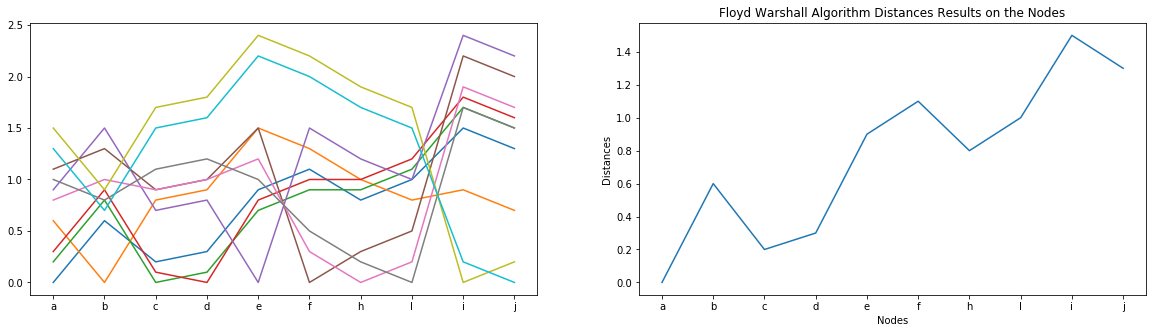

In [11]:
import matplotlib.pyplot as plt
import time
start = time.time()
mat = floyd_warshall_output(G1)
for i in range(0,len(mat)):
  print ("floyd_warshall distances are :" , mat[i] )
end = time.time()
print(f"Runtime of the program is {end - start}")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plt.xlabel('Nodes')
plt.ylabel('Distances')
#change type of dict to list for using data for plotting
data_floyd = list(mat)
array_floyd = np.array(data_floyd)
x1 = list(G1.nodes)

for i in range(0,len(G1)):
  y1 = [float(i) for i in array_floyd[:,i]]
  axes[0].plot(x1,y1)
plt.xlabel('Nodes')
plt.ylabel('Distances')

##for node "a"
x2 = list(G1.nodes)
y2 = [float(i) for i in array_floyd[:,0]]
axes[1].plot(x2,y2)
plt.title('Floyd Warshall Algorithm Distances Results on the Nodes')

# Johnson's Algorithm

    pseudo-code describes Johnson's algorithm
    Johnson(G)
        1.
        create G` where G`.V = G.V + {s},
            G`.E = G.E + ((s, u) for u in G.V), and 
            weight(s, u) = 0 for u in G.V
        2.
        if Bellman-Ford(s) == False
            return "The input graph has a negative weight cycle"
        else:
            for vertex v in G`.V:
                h(v) = distance(s, v) computed by Bellman-Ford
            for edge (u, v) in G`.E:
                weight`(u, v) = weight(u, v) + h(u) - h(v)
        3.
            D = new matrix of distances initialized to infinity
            for vertex u in G.V:
                run Dijkstra(G, weight`, u) to compute distance`(u, v) for all v in G.V
                for each vertex v in G.V:
                    D_(u, v) = distance`(u, v) + h(v) - h(u)
            return D

In [12]:
import matplotlib.pyplot as plt
import numpy as np


# Implementation of Johnson's algorithm in Python3 
  
# Import function to initialize the dictionary 
from collections import defaultdict 
MAX_INT = float('Inf') 
  
# Returns the vertex with minimum  
# distance from the source 
def minDistance(dist, visited): 
  
    (minimum, minVertex) = (MAX_INT, 0) 
    for vertex in range(len(dist)): 
        if minimum > dist[vertex] and visited[vertex] == False: 
            (minimum, minVertex) = (dist[vertex], vertex) 
  
    return minVertex 
  
  
# Dijkstra Algorithm for Modified  
# Graph (removing negative weights) 

def Dijkstra(graph, modifiedGraph, src): 
   
    # Number of vertices in the graph 
    num_vertices = len(graph) 
  
    # Dictionary to check if given vertex is  
    # already included in the shortest path tree 
    sptSet = defaultdict(lambda : False) 
  
    # Shortest distance of all vertices from the source 
    dist = [MAX_INT] * num_vertices 
  
    dist[src] = 0
  
    for count in range(num_vertices): 
  
        # The current vertex which is at min Distance  
        # from the source and not yet included in the  
        # shortest path tree 
        curVertex = minDistance(dist, sptSet) 
        sptSet[curVertex] = True
  
        for vertex in range(num_vertices):
            
            if ((sptSet[vertex] == False) and
                (dist[vertex] > (dist[curVertex] + 
                modifiedGraph[curVertex][vertex])) and
                (graph[curVertex][vertex] != 0)): 
                  
                dist[vertex] = (dist[curVertex] +
                                modifiedGraph[curVertex][vertex]); 
   
    # Print the Shortest distance from the source 
          
    for vertex in range(num_vertices):  
        print ('Vertex ' + str(vertex) + ': ' + str(dist[vertex]))
    
    #return{vertex:dist[vertex]}
      
    return{vertex:dist[vertex] for vertex in range(num_vertices)}     
  

# Function to calculate shortest distances from source 
# to all other vertices using Bellman-Ford algorithm 
def BellmanFord(edges, graph, num_vertices): 
  
    # Add a source s and calculate its min 
    # distance from every other node 
    dist = [MAX_INT] * (num_vertices + 1) 
    dist[num_vertices] = 0
  
    for i in range(num_vertices): 
        edges.append([num_vertices, i, 0]) 
  
    for i in range(num_vertices): 
        for (src, des, weight) in edges: 
            if((dist[src] != MAX_INT) and 
                    (dist[src] + weight < dist[des])): 
                dist[des] = dist[src] + weight 
  
    # Don't send the value for the source added
 
    return dist[0:num_vertices] 
  
# Function to implement Johnson Algorithm 
def JohnsonAlgorithm(graph): 
    a=nx.to_numpy_array(graph)
    graph=a.tolist()
  
    edges = [] 
  
    # Create a list of edges for Bellman-Ford Algorithm 
    for i in range(len(graph)): 
        for j in range(len(graph[i])): 
  
            if graph[i][j] != 0: 
                edges.append([i, j, graph[i][j]]) 
  
    # Weights used to modify the original weights 
    modifyWeights = BellmanFord(edges, graph, len(graph)) 
  
    modifiedGraph = [[0 for x in range(len(graph))] for y in
                    range(len(graph))] 
  
    # Modify the weights to get rid of negative weights 
    for i in range(len(graph)): 
        for j in range(len(graph[i])): 
  
            if graph[i][j] != 0: 
                modifiedGraph[i][j] = (graph[i][j] + 
                        modifyWeights[i] - modifyWeights[j]); 
  
    print ('Modified Graph: ' + str(modifiedGraph)) 
  
    # Run Dijkstra for every vertex as source one by one 
    for src in range(len(graph)): 
        print ('\nShortest Distance with vertex ' +
                        str(src) + ' as the source:\n') 
        Dijkstra(graph, modifiedGraph, src)
  

# Driver Code 
# graph = a_to_list

# import time

# start = time.time()
# JohnsonAlgorithm(graph)
# end = time.time()
# al_time=end - start
   
# print(f"Runtime of the program is {al_time}")


In [13]:
start = time.time()
JohnsonAlgorithm(G1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Modified Graph: [[0, 0.6, 0.2, 0.3, 0, 0, 0.8, 0, 0, 0], [0.6, 0, 0, 0, 0, 0, 0, 0.8, 2.0, 0.7], [0.2, 0, 0, 0.1, 0.7, 0.9, 0.9, 0, 0, 0], [0.3, 0, 0.1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.7, 0, 0, 0, 0, 1.0, 0, 0], [0, 0, 0.9, 0, 0, 0, 0.3, 0, 0, 0], [0.8, 0, 0.9, 0, 0, 0.3, 0, 0.2, 0, 0], [0, 0.8, 0, 0, 1.0, 0, 0.2, 0, 0, 0], [0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0.2], [0, 0.7, 0, 0, 0, 0, 0, 0, 0.2, 0]]

Shortest Distance with vertex 0 as the source:

Vertex 0: 0
Vertex 1: 0.6
Vertex 2: 0.2
Vertex 3: 0.3
Vertex 4: 0.8999999999999999
Vertex 5: 1.1
Vertex 6: 0.8
Vertex 7: 1.0
Vertex 8: 1.4999999999999998
Vertex 9: 1.2999999999999998

Shortest Distance with vertex 1 as the source:

Vertex 0: 0.6
Vertex 1: 0
Vertex 2: 0.8
Vertex 3: 0.8999999999999999
Vertex 4: 1.5
Vertex 5: 1.3
Vertex 6: 1.0
Vertex 7: 0.8
Vertex 8: 0.8999999999999999
Vertex 9: 0.7

Shortest Distance with vertex 2 as the source:

Vertex 0: 0.2
Vertex 1: 0.8
Vertex 2: 0
Vertex 3: 0.1
Vertex 4: 0.7
Vertex 5: 0.9
Vertex 6: 0.9
Vertex 7:

Vertex 0: 0
Vertex 1: 0.6
Vertex 2: 0.2
Vertex 3: 0.3
Vertex 4: 0.8999999999999999
Vertex 5: 1.1
Vertex 6: 0.8
Vertex 7: 1.0
Vertex 8: 1.4999999999999998
Vertex 9: 1.2999999999999998
Vertex 0: 0
Vertex 1: 0.6
Vertex 2: 0.2
Vertex 3: 0.3
Vertex 4: 0.8999999999999999
Vertex 5: 1.1
Vertex 6: 0.8
Vertex 7: 1.0
Vertex 8: 1.4999999999999998
Vertex 9: 1.2999999999999998
Vertex 0: 0.6
Vertex 1: 0
Vertex 2: 0.8
Vertex 3: 0.8999999999999999
Vertex 4: 1.5
Vertex 5: 1.3
Vertex 6: 1.0
Vertex 7: 0.8
Vertex 8: 0.8999999999999999
Vertex 9: 0.7
Vertex 0: 0.2
Vertex 1: 0.8
Vertex 2: 0
Vertex 3: 0.1
Vertex 4: 0.7
Vertex 5: 0.9
Vertex 6: 0.9
Vertex 7: 1.1
Vertex 8: 1.7
Vertex 9: 1.5
Vertex 0: 0.3
Vertex 1: 0.8999999999999999
Vertex 2: 0.1
Vertex 3: 0
Vertex 4: 0.7999999999999999
Vertex 5: 1.0
Vertex 6: 1.0
Vertex 7: 1.2
Vertex 8: 1.7999999999999998
Vertex 9: 1.5999999999999999
Vertex 0: 0.8999999999999999
Vertex 1: 1.5
Vertex 2: 0.7
Vertex 3: 0.7999999999999999
Vertex 4: 0
Vertex 5: 1.5
Vertex 6: 1.2
Vert

Text(0, 0.5, 'Distances')

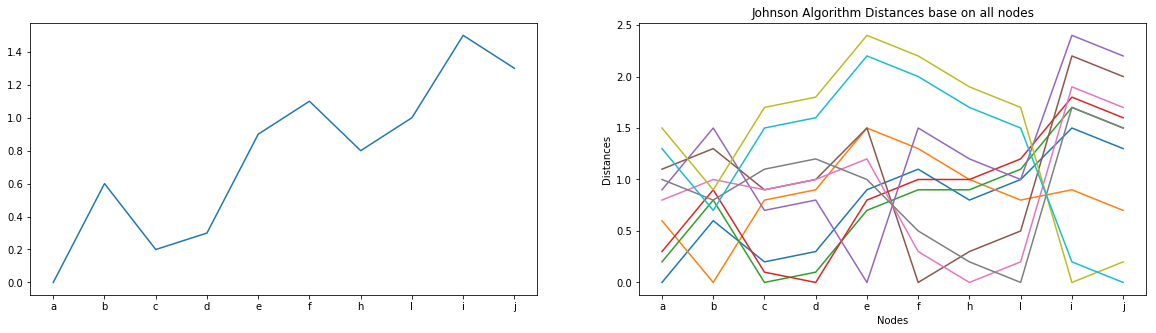

In [23]:
a=nx.to_numpy_array(G1)
a_to_list=a.tolist()
D=Dijkstra(a_to_list,a_to_list,0)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plt.xlabel('Nodes')
plt.ylabel('Distances')
data_dij= list(D.items())
an_array_dij = np.array(data_dij)
x1 = ['a','b','c','d','e','f','h','l','i','j']
y1= [float(i) for i in an_array_dij[:,1]]
axes[0].plot(x1,y1)

plt.xlabel('Nodes')
plt.ylabel('Distances')
plt.title('Johnson Algorithm Distances base on node a')
for src in range(len(a_to_list)): 
    D=Dijkstra(a_to_list,a_to_list,src)
    data_dij= list(D.items())
    an_array_dij = np.array(data_dij)
    x2 = ['a','b','c','d','e','f','h','l','i','j']
    y2 = [float(i) for i in an_array_dij[:,1]]
    axes[1].plot(x2,y2)
plt.title('Johnson Algorithm Distances base on all nodes')    
plt.xlabel('Nodes')
plt.ylabel('Distances')

#plt.savefig('plot for all nodes.png', bbox_inches='tight')

# Network with random weights

### Network with 100 nodes

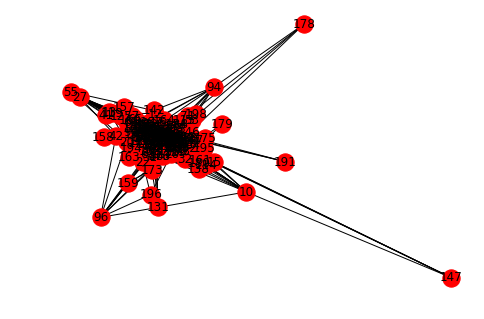

In [77]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

k1= np.random.randint(-5,20,5450)
k2= np.random.randint(-5,20,5450)
k= k1+k2

o= np.random.randint(1,200,5450)
G2=nx.Graph()

for i in range (1,100):
    for j in range (1,10):
        G2.add_edge(i, o[i*j-i+j], weight=k[i*j-j])

nx.draw(G2, with_labels=True) 
plt.show() 

### Here we are going to see the performance of each algorithm for positive delays vs the number of the nodes of the network. We ran the codes before and here we just have the results.

As we can see Dijkstra algorithm is the fastest algorithm then, Bellman_ford , Johnson and at the end we have Floyd_Warshal. Since Floyd_Warshal is the slowest one, we do not use it in the optimization part. 

Since Bellman_Ford algorithm and Dijkstra Algorithm runtime are very similaer, in the graph we can not see the Bellman_Ford very good but from the times we understand that Dijkstar is fastar than Bellman_Ford. 

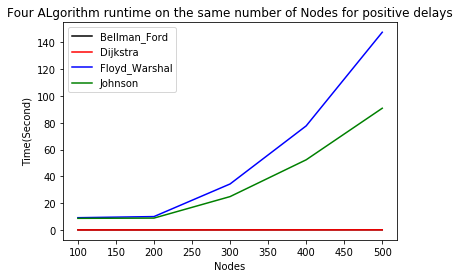

In [69]:
Bell_man_runtime = [0.023984193801879883,0.025988340377807617,0.06296491622924805,0.07496070861816406,0.0799570083618164]
Dijkstra_runtime = [0.011992216110229492,0.0199892520904541,0.030983924865722656,0.055970191955566406,0.05597233772277832]
Floyd_runtime = [9.138299226760864,9.968877792358398,34.31936526298523,77.66709923744202,147.5828127861023]
Johnson_runtime = [8.657552003860474,8.8374605178833,24.89047360420227,52.356316804885864,90.8533194065094]
nodes = [100,200,300,400,500]
plt.plot(nodes,Bell_man_runtime,label='Bellman_Ford',color ='black')
plt.plot(nodes,Dijkstra_runtime,label='Dijkstra',color ='red')
plt.plot(nodes,Floyd_runtime,label='Floyd_Warshal',color ='blue')
plt.plot(nodes,Johnson_runtime,label='Johnson',color= 'green')
plt.title('Four ALgorithm runtime on the same number of Nodes for positive delays')
plt.xlabel('Nodes')
plt.ylabel('Time(Second)')
plt.legend()

# Optimization

After we saw the performance of the algorithms we decided to make an optimized algorithm.

We know that Dijkstra algorithm can not work on the networks with negative delays but it has best performance on the network with positive delays and also bellman_ford does not work with negative cycles but has better performance than Johnson's algorithm so first, we check the negative delays(weights) of the network and then the negative cycles of it, then we decide the algorithm to use.

In [70]:
def Optimization(graph, start, end):
  start1 = time.time()

  list1 =[]
  for (u, v, wt) in graph.edges.data('weight'):
    list1.append(wt)
  
  if min(list1) >= 0:
      print("Since all the weights are positive we use Dijkstra Algorithm")
      output = dijkstra(graph, start,end)
      end1 = time.time()
      time_opt = end1 - start1
      print(f"Runtime of the program is {end1 - start1}")
  else:
    h,d= bellman_ford(graph, start,end)
    if d[1]>= 0:
        print("Since we have negative weights we use Bellman_Ford Algorithm")
        output = d
        end1 = time.time()
        time_opt = end1 - start1
        print(f"Runtime of the program is {end1 - start1}")
    else:
#       G_John = nx.to_numpy_array(graph)
#       G_John_to_list=G_John.tolist()
      print("Since we have negative cycles we use Johnson Algorithm")
      output = JohnsonAlgorithm(graph)
      end1 = time.time()
      time_opt = end1 - start1
      print(f"Runtime of the program is {end1 - start1}")
  return output, time_opt

#### For this part we are going to see the runtime result of Johnson's algorithm and Optimized algorithm versus the number of nodes of the network. For this part we used random vectors from -4 to 20 to ensure that the network will have negative cycles.

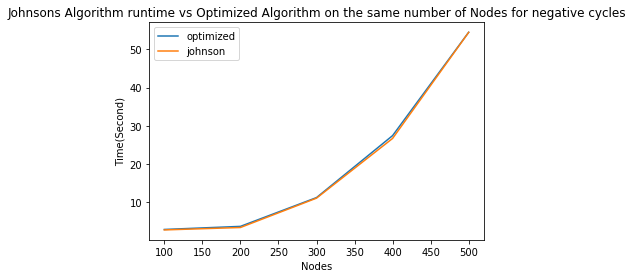

In [72]:
runtime_opt = [2.8528432846069336,3.6596622467041016,11.19705080986023,27.426850080490112,54.48805904388428]
runtime_john = [2.7328615188598633,3.3620734214782715,11.050863027572632,26.686607599258423,54.467050313949585]
nodes = [100,200,300,400,500]

plt.plot(nodes,runtime_opt,label='optimized')
plt.plot(nodes,runtime_john,label='johnson')
plt.title('Johnsons Algorithm runtime vs Optimized Algorithm on the same number of Nodes for negative cycles')
plt.xlabel('Nodes')
plt.ylabel('Time(Second)')
plt.legend()

#### Now we change the random vector to 1 to 20 to ensure that we have positive delays.

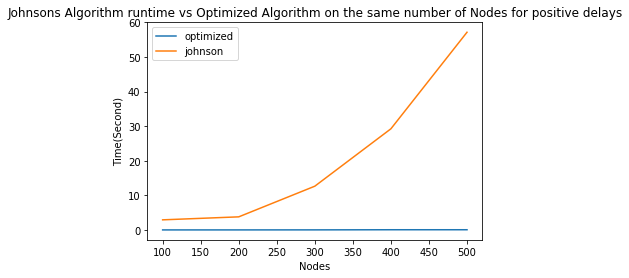

In [74]:
runtime_opt1 = [0.01595473289489746,0.01894831657409668,0.029916763305664062,0.0668172836303711,0.06582379341125488]
runtime_john1 = [2.9262874126434326,3.79034686088562,12.649223566055298,29.23004150390625,57.11960220336914]
nodes = [100,200,300,400,500]
plt.plot(nodes,runtime_opt1,label='optimized')
plt.plot(nodes,runtime_john1,label='johnson')
plt.title('Johnsons Algorithm runtime vs Optimized Algorithm on the same number of Nodes for positive delays')
plt.xlabel('Nodes')
plt.ylabel('Time(Second)')
plt.legend()

#### Now we change the random vector both to -1 to 20.

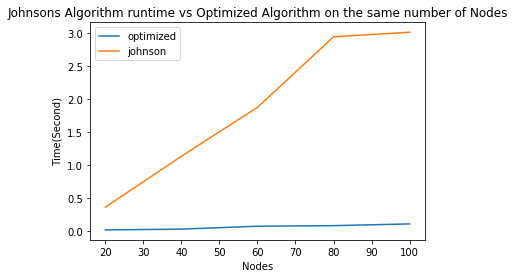

In [75]:
runtime_opt2 = [0.01496577262878418,0.02692866325378418,0.07081079483032227,0.07978510856628418,0.1057126522064209]
runtime_john2 = [0.3584282398223877,1.1299817562103271,1.8714807033538818,2.939188241958618,3.008173704147339]
nodes = [20,40,60,80,100]
plt.plot(nodes,runtime_opt2,label='optimized')
plt.plot(nodes,runtime_john2,label='johnson')
plt.title('Johnsons Algorithm runtime vs Optimized Algorithm on the same number of Nodes')
plt.xlabel('Nodes')
plt.ylabel('Time(Second)')
plt.legend()